###  逻辑回归（Logistic Regression）

###  1.主要内容
Logistic Regression 虽然被称为回归，但其实际上是分类模型，并常用于二分类。Logistic Regression 因其简单、可并行化、可解释强,深受工业界喜爱。 

逻辑回归函数：$y=Sigmoid(W^{T}X)$，其中$X\in R^{n \times m}$。n是样本的维度特征，m是样本数量

$Sigmoid(Z)=\frac{1}{1+e^{-Z}}$

假设预测为正类的概率为:
    $p_{+}=y=\frac{1}{1+e^{-Z}}=\frac{1}{1+e^{-W^{T}X}}$
    
相应预测为负类的概率为
    $p_{-}=1-p_{+}$
    
解得
    $ln(odds)=ln(\frac{p_{+}}{p_{-}})=ln(e^{Z})=Z=W^{T}X$

###  2.损失函数

假设样本服从二项分布，$p_{i}$代表预测为正类的概率，$y_{i}$表示$Sigmoid(W^{T}X_{i})$则样本的对数似然函数推导为：
    $$ln(Prob(D))=\sum _{i=1}^{m}y_{i}+(1-y_{i})ln(1-p_{i})$$

为使得似然函数最大，我们让损失函数为:
  $$loss=-(\sum _{i=1}^{m}y_{i}+(1-y_{i})ln(1-p_{i}))$$

### 3.梯度计算

经过计算推导可得到：$$\frac{\partial loss}{\partial W}=X(P-Y)^{T}$$
其中$X\in R^{n\times m}$，$Y\in R^{1\times m}$，$y=p$(即经过sigmoid函数后的值)

### 4.作业

导入必要的库，并设置画图参数

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams  ## run command settings for plotting
from sklearn.model_selection import train_test_split 
#导入必要的库
#设置画图参数
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号
    'axes.unicode_minus': False # 处理负号
}
rcParams.update(config)

引入数据并查看前五行

In [222]:
path='D:/CPP in vscode/机器学习/逻辑回归/ex2data1.txt'
data=pd.read_csv(path,header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


将数据进行划分并进行标准化

In [223]:
data.insert(0, 'ones', 1)#在第一行插入全1
cols=data.shape[1]
X_data=data.iloc[:,:cols-1]
y_data=data.iloc[:,cols-1:]
X=X_data.values
y=y_data.values
(X.shape,y.shape)

((100, 3), (100, 1))

In [224]:
#划分数据集
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [225]:
for i in range(1, cols-1):
    #max = x_train[:, i:i+1].max()
    #min = x_train[:, i:i+1].min()
    #x_train[:, i:i+1] = (x_train[:, i:i+1] - min) / (max - min)
    #x_test[:, i:i+1] = (x_test[:, i:i+1] - min) / (max - min)
    mean = x_train[:, i].mean()
    std = x_train[:, i].std()
    x_train[:, i] = (x_train[:, i] - mean) / std
    x_test[:, i] = (x_test[:, i] - mean) / std
#x_mean=x_train[:,1:].mean()
#x_std=x_train[:,1:].std()
#x_train[:,1:]=(x_train[:,1:]-x_mean) / x_std
#x_test[:,1:]=(x_test[:,1:]-x_mean) / x_std

In [226]:
(x_train.shape,y_train.shape)

((75, 3), (75, 1))

构建逻辑回归模型

In [227]:
#设W为（3,1）的矩阵
def Sigmoid(X,W):
    return 1/(1+np.exp(-(X@W)))
def loss(X,Y,W):
    y=Sigmoid(X,W)
    loss_=-(np.sum(Y*np.log(y)+(1-Y)*np.log(1-y)))/X.shape[0]
    return loss_
#已知X(70,3),Y(70,1),W(3,1)
def gradient(X,Y,W,alpha,lambdaReg):
    y=Sigmoid(X,W)
    dw=(X.T@(y-Y)+lambdaReg*W)/X.shape[0] #如果loss除了样本数，此处就必须要除样本数
    W-=alpha*dw
    return W
def logstic_Regression(X,Y,alpha,iters,lambdaReg):
    dW_list=[]
    feature_dim=X.shape[1]
    W=np.zeros((feature_dim,1))#初始化W系数矩阵
    for _ in range(iters):
        W=gradient(X,Y,W,alpha,lambdaReg)
        W_=W.copy()
        dW_list.append(W_)
    return dW_list
def predict(X,W):
    p=Sigmoid(X,W)
    y_pre=np.array(p>=0.5,dtype=int)  #数组内大于0.5的都会被赋为1
    return y_pre,p



训练模型

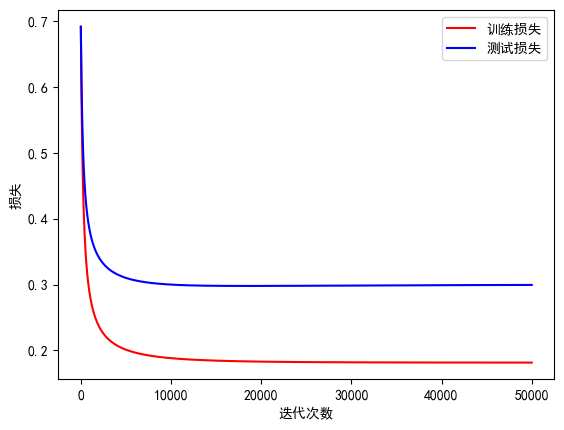

In [228]:
#设置训练参数
alpha=0.01
iters=50000
lambdaReg=0.01
#开始训练
dW_list=logstic_Regression(x_train,y_train,alpha,iters,lambdaReg)
train_loss=[]
test_loss=[]
for W in dW_list:
    train_loss.append(loss(x_train,y_train,W))
    test_loss.append(loss(x_test,y_test,W))
iter = np.arange(iters)
plt.figure()
plt.plot(iter,train_loss,'r',label='训练损失')
plt.plot(iter,test_loss,'b',label='测试损失')
plt.legend()
plt.xlabel("迭代次数")
plt.ylabel("损失")
plt.show()


###  模型测试

In [229]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score,precision_score, roc_auc_score, roc_curve

y_train_pred,y_train_prob=predict(x_train,dW_list[-1])
y_test_pred,y_test_prob=predict(x_test,dW_list[-1])

r_train=accuracy_score(y_train,  y_train_pred)
p_train=precision_score(y_train, y_train_pred)

r_test=accuracy_score(y_test,y_test_pred)
p_test=precision_score(y_test,y_test_pred)

F1_train=2*r_train*p_train/(r_train+p_train)
F1_test=2*r_test*p_test/(r_test+p_test)

table = PrettyTable()
table.title = "模型评估指标"
table.field_names = ["指标", "训练集", "测试集"]


table.add_row(["召回率 (Recall)", r_train, r_test])
table.add_row(["精确率 (Precision)", p_train, p_test])
table.add_row(["F1分数 (F1-Score)", F1_train, F1_test])
print(table)

+--------------------------------------------------------------+
|                         模型评估指标                         |
+--------------------+--------------------+--------------------+
|        指标        |       训练集       |       测试集       |
+--------------------+--------------------+--------------------+
|  召回率 (Recall)   |        0.92        |        0.88        |
| 精确率 (Precision) | 0.9183673469387755 | 0.8571428571428571 |
| F1分数 (F1-Score)  | 0.9191829484902309 | 0.8684210526315789 |
+--------------------+--------------------+--------------------+


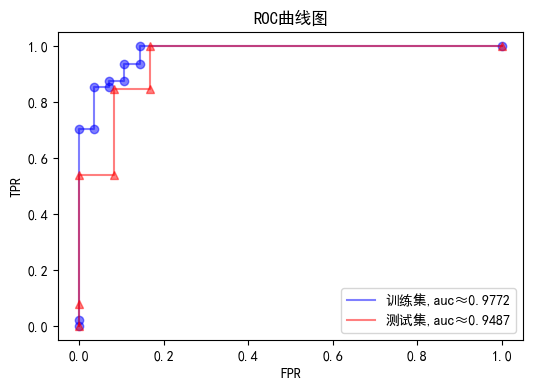

In [230]:


train_fpr,train_tpr,_=roc_curve(y_train,y_train_prob)
test_fpr,test_tpr,_=roc_curve(y_test,y_test_prob)


auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6,4))
plt.plot(train_fpr,train_tpr,color='b',label=f"训练集,auc≈{auc_train:.4f}",alpha=0.5)
plt.plot(train_fpr,train_tpr,'bo',alpha=0.5)
plt.plot(test_fpr,test_tpr,color='r',label=f"测试集,auc≈{auc_test:.4f}",alpha=0.5)
plt.plot(test_fpr,test_tpr,'r^',alpha=0.5)
plt.title('ROC曲线图')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

